In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
datos_singleSource1 = pd.read_csv('singleSourceScale/resultados_sigleSourceShortestPath1.csv')
datos_singleSource2 = pd.read_csv('singleSourceScale/resultados_sigleSourceShortestPath2.csv')

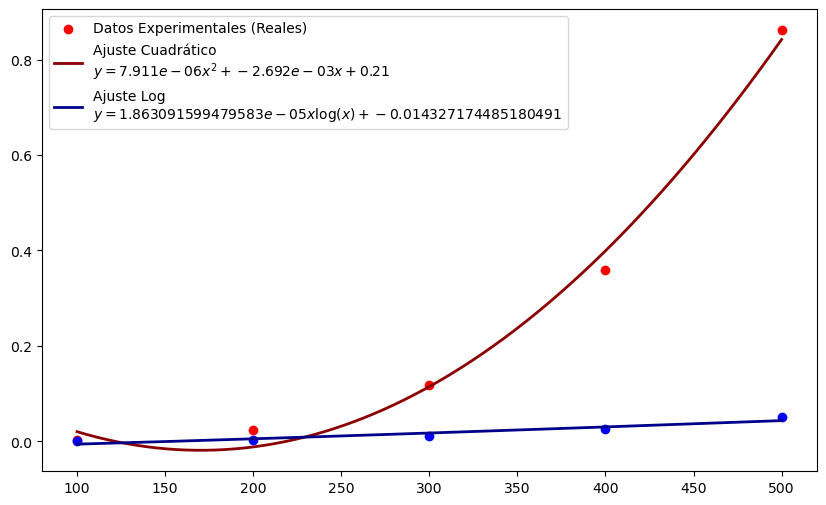

In [ ]:
x1=datos_singleSource1['Nodos'].values
y1=datos_singleSource1['Tiempo_Segundos'].values

x2= datos_singleSource2['Nodos'].values
y2=datos_singleSource2['Tiempo_Segundos'].values

#curva de ajuste para singleSource1
coeficientes_cuadraticos = np.polyfit(x1, y1, 2)
coeficientes_cubicos = np.polyfit(x1, y1, 3)
funcion_cuadratica = np.poly1d(coeficientes_cuadraticos)
funcion_cubica = np.poly1d(coeficientes_cubicos)
x_curva1 = np.linspace(x1.min(), x1.max(), 500)
y_curva1 = funcion_cuadratica(x_curva1)
y_curva1_cubica = funcion_cubica(x_curva1)

#ajuste logaritmico

def funcion_log_n(x, a, b):
    
    return a * x * np.log(x) + b
params_log, _ = curve_fit(funcion_log_n, x2, y2)
y_curva2 = funcion_log_n(x_curva1, *params_log)

a_l, b_l = params_log
label_log = f'Ajuste Log\n$y = {a_l}x \log(x) + {b_l}$'

plt.figure(figsize=(10, 6)) 


a_q, b_q, c_q = coeficientes_cuadraticos

label_cuadratico = f'Ajuste Cuadrático\n$y = {a_q:.3e}x^2 + {b_q:.3e}x + {c_q:.2f}$'


#plt.plot(x_curva, y_curva, color='blue', linewidth=2, label='Ajuste cubico')

plt.scatter(x1, y1, color='red', label='Datos Experimentales (Reales)')
plt.plot(x_curva1, y_curva1, color='darkred', linewidth=2, label=label_cuadratico)
#plt.plot(x_curva1, y_curva1_cubica, color='green', linewidth=2, label=label_cuadratico)
plt.plot(x_curva1, y_curva2, color='darkblue', linewidth=2, label=label_log)

plt.legend()
plt.scatter(x2, y2, color='blue', label='Datos Experimentales (Reales)')